In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical


In [2]:
env = gym.make('CartPole-v0')


c:\Python39\lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [3]:
class Policy(nn.Module):
    def __init__(self, state_size=4, action_size=2, hidden_size=32):
        super(Policy, self).__init__()
        self.fc1 = nn.Linear(state_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, action_size)
        
    def forward(self, state):
        x = F.relu(self.fc1(state))
        x = self.fc2(x)
        return F.softmax(x, dim=1)
    
    def act(self, state):
        state = torch.from_numpy(state).float().unsqueeze(0)
        probs = self.forward(state).cpu()
        model = Categorical(probs)
        action = model.sample()
        return action.item(), model.log_prob(action)
    

In [4]:
def reinforce(policy, policy_optimizer, n_episodes=1000, max_t=1000, gamma=1.0, print_every=100):    
    scores_deque = deque(maxlen=100)
    scores = []
    policy_loss_ = []
    for e in range(n_episodes):
        saved_log_probs = []
        rewards = []
        states = []
        env.reset()
        state = env.state        
    
        for t in range(max_t):
            action, log_prob = policy.act(state)
            saved_log_probs.append(log_prob)
            state, reward, done, _, _= env.step(action)
            rewards.append(reward)
             
            if done:
                break
            
        R = rewards
        i = len(rewards)-2
        while i>=0:
          R[i] = R[i] + R[i+1]
          i= i-1

        scores.append(sum(rewards))
                       
        for i, log_prob in enumerate(saved_log_probs):
            policy_loss_.append(-log_prob * R[i])
    
    #print(len(policy_loss_))
    #print(policy_loss_)
    policy_loss = torch.cat(policy_loss_).sum()  
    policy_optimizer.zero_grad()
    policy_loss.backward()
    policy_optimizer.step()

    return np.mean(scores)


In [5]:

policy = Policy()
policy_optimizer = optim.Adam(policy.parameters(), lr=1e-2)
rewards = []

for itr in range(100):
    print("Running iteration: ", itr)
    rewards.append(reinforce(policy, policy_optimizer, n_episodes=1000, max_t = 500))

x_axis = [i for i in range(1, 101)]
plt.plot(x_axis, rewards)  


Running iteration:  0
Running iteration:  1
Running iteration:  2
Running iteration:  3
Running iteration:  4
Running iteration:  5
Running iteration:  6
Running iteration:  7
Running iteration:  8
Running iteration:  9
Running iteration:  10
Running iteration:  11
Running iteration:  12
Running iteration:  13
Running iteration:  14
Running iteration:  15
Running iteration:  16
Running iteration:  17
Running iteration:  18
Running iteration:  19
Running iteration:  20
Running iteration:  21
Running iteration:  22
Running iteration:  23
Running iteration:  24
Running iteration:  25
Running iteration:  26
Running iteration:  27
Running iteration:  28
Running iteration:  29
Running iteration:  30
Running iteration:  31
Running iteration:  32
Running iteration:  33
Running iteration:  34
Running iteration:  35
Running iteration:  36
Running iteration:  37
Running iteration:  38
Running iteration:  39
Running iteration:  40
Running iteration:  41
Running iteration:  42
Running iteration:  4

KeyboardInterrupt: 

Text(0, 0.5, 'Mean score')

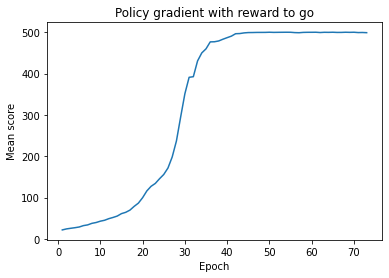

In [8]:
x_axis = [i for i in range(1, len(rewards)+1)]
plt.plot(x_axis, rewards)
plt.title("Policy gradient with reward to go")
plt.xlabel("Epoch")
plt.ylabel("Mean score")